In [5]:
import pandas as pd

In [6]:
ya = pd.read_csv("LB_TA.txt", delimiter = r"\s+")
ya

,gvkey,datadate,fyear,tic,at
0,1004,20090531,2008,AIR,1377.511
1,1004,20100531,2009,AIR,1501.042
2,1004,20110531,2010,AIR,1703.727
3,1004,20120531,2011,AIR,2195.653
4,1004,20130531,2012,AIR,2136.900
...,...,...,...,...,...
13371,15743,20111231,2011,DBSDY,263242.972
13372,15743,20121231,2012,DBSDY,289039.627
13373,15743,20121231,2012,DBSDY,289039.627
13374,15743,20131231,2013,DBSDY,318497.861


Menyajikan data dalam format txt

In [7]:
ya = ya.drop_duplicates()
ya

,gvkey,datadate,fyear,tic,at
0,1004,20090531,2008,AIR,1377.511
1,1004,20100531,2009,AIR,1501.042
2,1004,20110531,2010,AIR,1703.727
3,1004,20120531,2011,AIR,2195.653
4,1004,20130531,2012,AIR,2136.900
...,...,...,...,...,...
13366,15743,20091231,2009,DBSDY,184285.002
13368,15743,20101231,2010,DBSDY,220186.263
13370,15743,20111231,2011,DBSDY,263242.972
13372,15743,20121231,2012,DBSDY,289039.627


Menghilangkan data duplikat

In [8]:
ya = df.dropna(subset=['at'])
ya

,gvkey,datadate,fyear,tic,at
0,1004,20090531,2008.0,AIR,1377.511
1,1004,20100531,2009.0,AIR,1501.042
2,1004,20110531,2010.0,AIR,1703.727
3,1004,20120531,2011.0,AIR,2195.653
4,1004,20130531,2012.0,AIR,2136.900
...,...,...,...,...,...
13371,15743,20111231,2011.0,DBSDY,263242.972
13372,15743,20121231,2012.0,DBSDY,289039.627
13373,15743,20121231,2012.0,DBSDY,289039.627
13374,15743,20131231,2013.0,DBSDY,318497.861


Membuang data dengan nilai kosong pada kolom tertentu

In [9]:
ya = ya.groupby('tic')['at'].mean().reset_index()
ya

,tic,at
0,0015B,2496.421833
1,0032A,37416.666667
2,0033A,47801.000000
3,0053A,519.300500
4,0065A,2132.350000
...,...,...
2242,ZNT,2479.513500
2243,ZQKSQ,1803.654500
2244,ZRBA,21.217500
2245,ZTS,5953.750000


Menghitung rata-rata kolom AT berdasarkan grup di kolom TIC

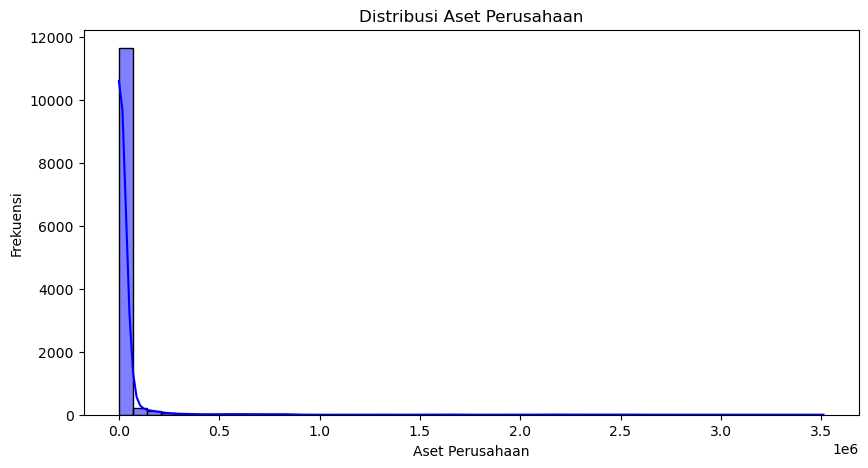

In [48]:
# REGRESI LINIER: Prediksi aset berdasarkan tahun fiskal
X = df_cleaned[['fyear']]
y = df_cleaned['at']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Koefisien Regresi: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {mse}")

# CLUSTERING (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned.loc[:, 'cluster'] = kmeans.fit_predict(df_cleaned[['at']])


# Menampilkan contoh hasil clustering
print(df_cleaned[['tic', 'at', 'cluster']].head(10))
print("Centroid Cluster:", kmeans.cluster_centers_)

Koefisien Regresi: 940.761562631675
Intercept: -1860056.235196567
Mean Squared Error (MSE): 28304816388.509033
    tic        at  cluster
0   AIR  1377.511        0
1   AIR  1501.042        0
2   AIR  1703.727        0
3   AIR  2195.653        0
4   AIR  2136.900        0
5   AIR  2199.500        0
6  ADCT  1921.000        0
7  ADCT  1343.600        0
8  ADCT  1474.500        0
9  IWKS    21.401        0
Centroid Cluster: [[  10379.43417301]
 [2210086.70277027]
 [ 617703.73776429]]
